# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data=[]
labels=[]

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

In [3]:
for i in range(classes) :
    path = "train/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

train/0/
train/1/
train/2/
train/3/
train/4/
train/5/
train/6/
train/7/
train/8/
train/9/
train/10/
train/11/
train/12/
train/13/
train/14/
train/15/
train/16/
train/17/
train/18/
train/19/
train/20/
train/21/
train/22/
train/23/
train/24/
train/25/
train/26/
train/27/
train/28/
train/29/
train/30/
train/31/
train/32/
train/33/
train/34/
train/35/
train/36/
train/37/
train/38/
train/39/
train/40/
train/41/
train/42/


# Randomize the order of the input images

In [4]:
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

# Splitting training and testing dataset

In [5]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]



# Converting the labels into one hot encoding

In [6]:

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

# Building Model

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu',))

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Dropout(rate =0.25))

In [12]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [13]:
cnn.add(tf.keras.layers.Dropout(rate =0.25))

In [14]:
cnn.add(tf.keras.layers.Flatten())

In [15]:
cnn.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [16]:
cnn.add(tf.keras.layers.Dropout(rate =0.5))

In [17]:
cnn.add(tf.keras.layers.Dense(units=43, activation='softmax'))

# Compiling the Model

In [18]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the Models and Saving the accuracy for each epochs

In [19]:
Model = cnn.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
981/981 [==============================] - 103s 105ms/step - loss: 1.1542 - accuracy: 0.6719 - val_loss: 0.1593 - val_accuracy: 0.9617
Epoch 2/20
981/981 [==============================] - 105s 107ms/step - loss: 0.2238 - accuracy: 0.9321 - val_loss: 0.0688 - val_accuracy: 0.9811
Epoch 3/20
981/981 [==============================] - 106s 108ms/step - loss: 0.1242 - accuracy: 0.9632 - val_loss: 0.0478 - val_accuracy: 0.9888
Epoch 4/20
981/981 [==============================] - 110s 112ms/step - loss: 0.0980 - accuracy: 0.9699 - val_loss: 0.0302 - val_accuracy: 0.9932
Epoch 5/20
981/981 [==============================] - 110s 112ms/step - loss: 0.0892 - accuracy: 0.9730 - val_loss: 0.0425 - val_accuracy: 0.9912
Epoch 6/20
981/981 [==============================] - 110s 113ms/step - loss: 0.0728 - accuracy: 0.9781 - val_loss: 0.0318 - val_accuracy: 0.9930
Epoch 7/20
981/981 [==============================] - 108s 110ms/step - loss: 0.0657 - accuracy: 0.9805 - val_loss: 0.0233 -

# Plotting graphs for accuracy

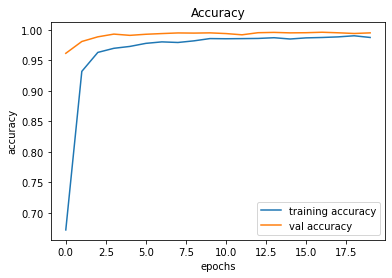

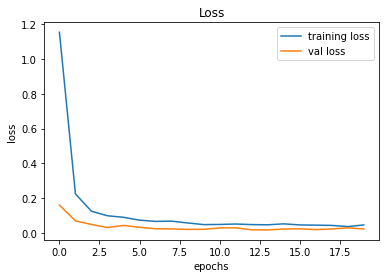

In [20]:
plt.figure(0)
plt.plot(Model.history['accuracy'], label='training accuracy')
plt.plot(Model.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show() 

plt.figure(1)
plt.plot( Model.history['loss'], label='training loss')
plt.plot(Model.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing accuracy on test dataset

In [29]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["Path"].values
y_test = y_test["ClassId"].values
data=[]
for f in labels:
    image=cv2.imread('test/'+f.replace('Test/', ''))
    image_from_array = Image.fromarray(image, 'RGB')
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = cnn.predict_classes(X_test)

# Accuracy with the test data

In [26]:
print(y_test)

[16  1 38 ...  6  7 10]


In [30]:
print(pred)

[16  1 38 ... 32  7 10]


In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

0.9753760886777514


# Saving the Model For Tkinter GUI

In [32]:
cnn.save('Traffic Sign Classifier.h5')